In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset from a CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


- It fetches the dataset directly from the UCI Machine Learning Repository and loads it into a pandas DataFrame, facilitating subsequent analysis

# Understanding the Shape of Data

## 1. Statistical Analysis

### a) Numerical Analysis

#### Exclude the species Column for Numerical Analysis
- skewness and kurtosis are applicable only to numeric data

In [2]:
# Exclude the 'species' column for numerical analysis
numerical_data = data.drop('species', axis=1)
numerical_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 1.Skewness

In [3]:
# Skewness
skewness = numerical_data.skew()
print("Skewness of each feature:\n", skewness)

Skewness of each feature:
 sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64


### 2.Kurtosis

In [4]:
# Kurtosis
kurtosis = numerical_data.kurt()
print("\nKurtosis of each feature:\n", kurtosis)


Kurtosis of each feature:
 sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64


### b) Categorical Analysis

### 1. Frequency Distribution

In [5]:
# Frequency count for each category
frequency_counts = data['species'].value_counts()
print("Frequency counts:\n", frequency_counts)

Frequency counts:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### 2. Proportion or Relative Frequency

In [6]:
# Relative frequency for each category
relative_frequency = data['species'].value_counts(normalize=True)
print("\nRelative frequency (proportion):\n", relative_frequency)


Relative frequency (proportion):
 species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


- normalize=True returns the proportion of each category relative to the total number of data points, giving a clearer picture of the distribution

### 3. Mode of Categorical Data

In [7]:
# Mode of the categorical variable
mode_value = data['species'].mode()[0]
print("\nMode (most frequent category):", mode_value)


Mode (most frequent category): Iris-setosa


## 2. Visualization

### a) Visualizing Numerical Variables

### 1. Histogram

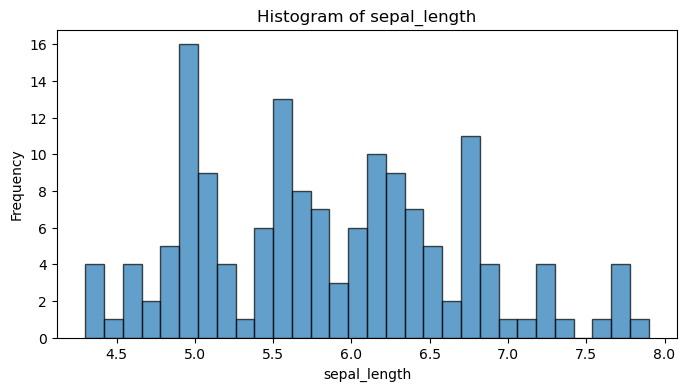

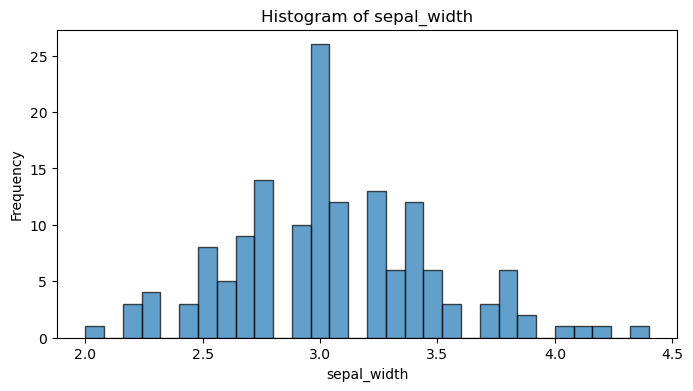

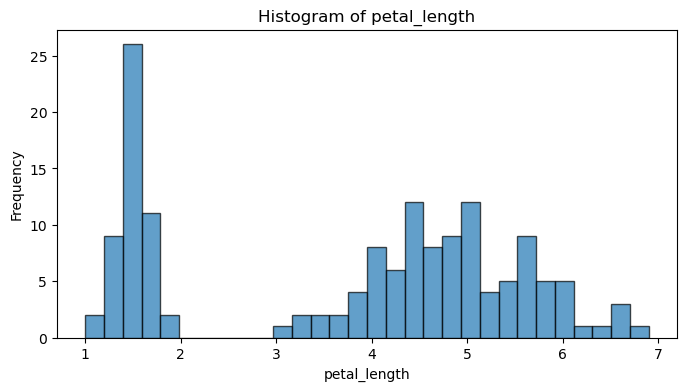

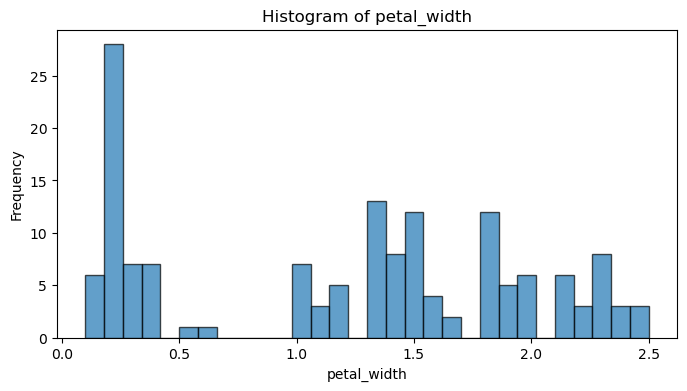

In [8]:
# Load necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing each numerical feature
numerical_data = data.select_dtypes(include=[float, int])

for column in numerical_data.columns:
    # Histogram
    plt.figure(figsize=(8, 4))
    plt.hist(numerical_data[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

### 2. Density Plot

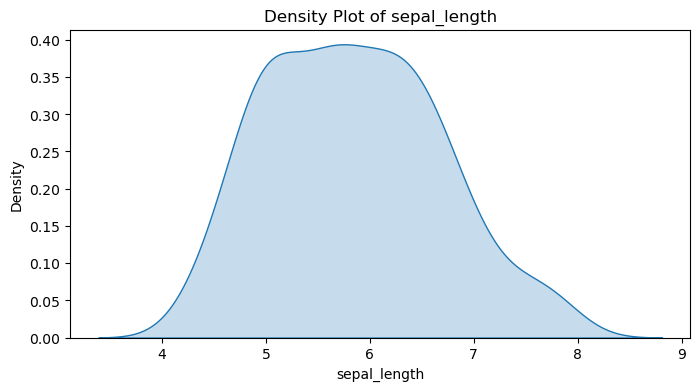

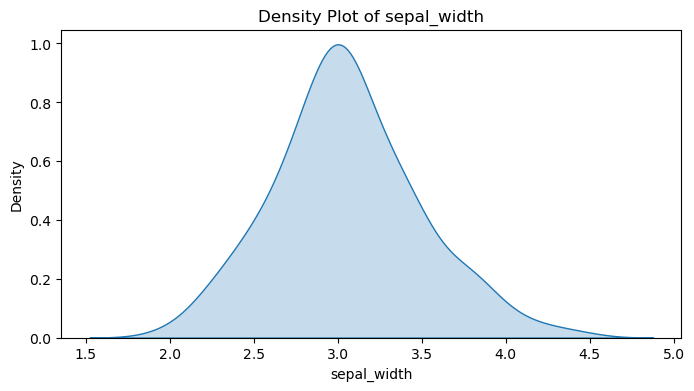

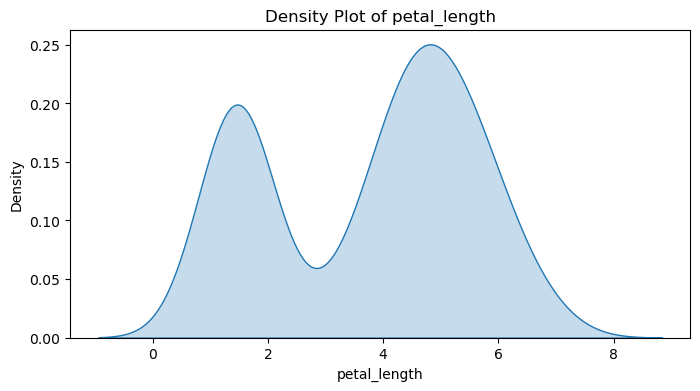

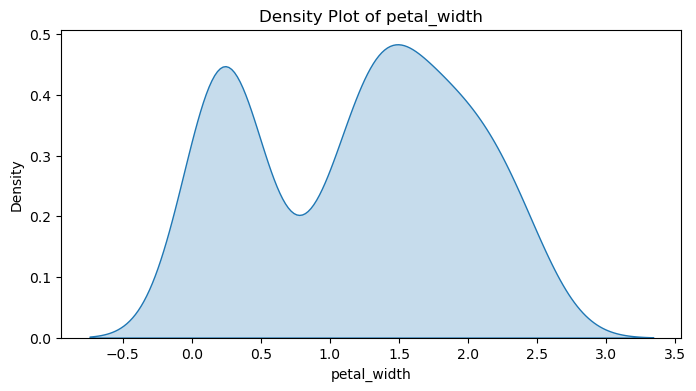

In [9]:
# Load necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing each numerical feature
numerical_data = data.select_dtypes(include=[float, int])

for column in numerical_data.columns:
    # Density Plot
    plt.figure(figsize=(8, 4))
    sns.kdeplot(numerical_data[column], fill=True)
    plt.title(f"Density Plot of {column}")
    plt.xlabel(column)
    plt.show()

### b) Visualizing Categorical Variables

### 1. Count Plot

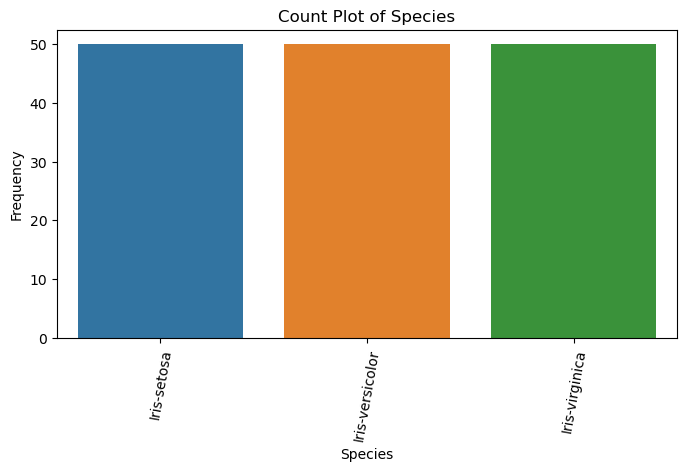

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate count plot for  categorical variable
plt.figure(figsize=(8, 4))
sns.countplot(x=data['species'])
plt.title(f"Count Plot of Species")
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.xticks(rotation=80)  # Rotate category labels if needed
plt.show()

### 2. Pie Chart

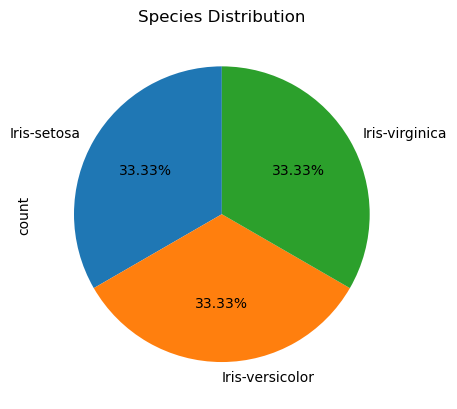

In [11]:
import matplotlib.pyplot as plt
# Pie chart for 'Gender' column
data['species'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=90)

# Adding title to the pie chart
plt.title('Species Distribution')

# Display the plot
plt.show()

# Understanding Central Tendency

## 1. Statistical Analysis

### a) Numerical Variables 

#### 1. Mean

In [12]:
mean_value = numerical_data.mean()
print("Mean of each numerical feature:\n", mean_value)

Mean of each numerical feature:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


#### 2. Median

In [13]:
median_value = numerical_data.median()
print("\nMedian of each numerical feature:\n", median_value)


Median of each numerical feature:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


#### 3. Mode

In [14]:
mode_value = numerical_data.mode().iloc[0]  # Use iloc to get the first mode if there are multiple
print("\nMode of each numerical feature:\n", mode_value)


Mode of each numerical feature:
 sepal_length    5.0
sepal_width     3.0
petal_length    1.5
petal_width     0.2
Name: 0, dtype: float64


### b) Categorical Variables 

- For categorical data, **mode** is the only measure of central tendency.

In [15]:
mode_value = data['species'].mode()[0]
print(f"\nMode of {column}: {mode_value}")


Mode of petal_width: Iris-setosa


## 2. Visualizing Central Tendency for Numerical Variables

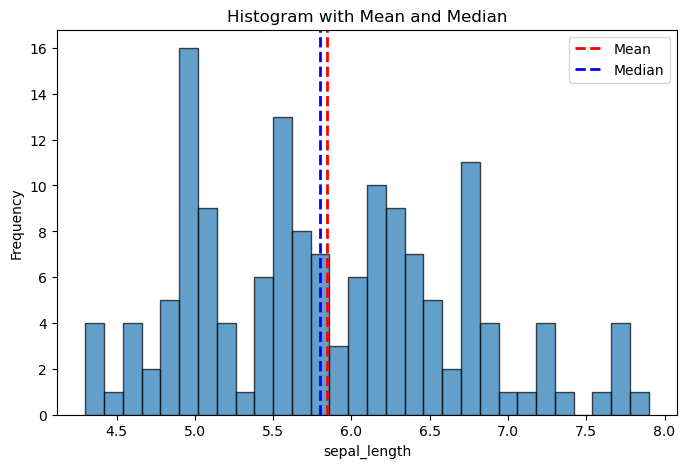

In [17]:
import matplotlib.pyplot as plt

# Example for a numerical variable
plt.figure(figsize=(8, 5))
plt.hist(data['sepal_length'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(data['sepal_length'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['sepal_length'].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.title('Histogram with Mean and Median')
plt.xlabel('sepal_length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

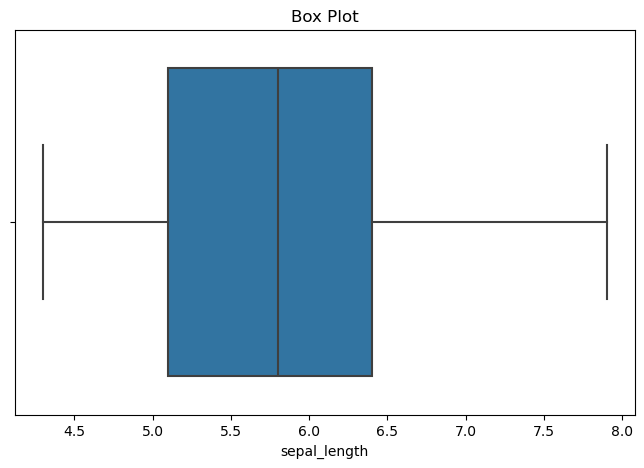

In [18]:
import seaborn as sns

# Box plot for a numerical variable
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['sepal_length'])
plt.title('Box Plot')
plt.xlabel('sepal_length')
plt.show()

## Visualizing Central Tendency for Categorical Variables

- Bar plot
- Count plot
- Pie chart

# Understanding Spread/Variability

## 1. Statistical Analysis - Numerical Variables

- Range
- Variance
- Standard deviation
- Interquartile Range
- Coefficient of variation

In [22]:
range_value = data['sepal_length'].max() - data['sepal_length'].min()
print("Range:", range_value)

Range: 3.6000000000000005


In [23]:
variance_value = data['sepal_length'].var()
print("Variance:", variance_value)

Variance: 0.6856935123042505


In [24]:
std_dev_value = data['sepal_length'].std()
print("Standard Deviation:", std_dev_value)

Standard Deviation: 0.8280661279778629


In [25]:
Q1 = data['sepal_length'].quantile(0.25)
Q3 = data['sepal_length'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 1.3000000000000007


## 1. Stastical Analysis - Categorical Variables

- Frequency distribution
- Proportion/Relative Frequency
- Number of unique categories

In [27]:
# Frequency distribution for a categorical variable
frequency_distribution = data['species'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [28]:
# Relative frequency for a categorical variable
relative_frequency = data['species'].value_counts(normalize=True)
print("\nRelative Frequency (Proportion):\n", relative_frequency)


Relative Frequency (Proportion):
 species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


In [29]:
unique_categories = data['species'].nunique()
print("\nNumber of Unique Categories:", unique_categories)


Number of Unique Categories: 3


## Visualizing Spread/Variabilty - Numerical Variables
- Histogram, Boxplot etc.,
## Visualizing Spread/Variabilty - Categorical Variables
- Barplot, Countplot, Pie Chart

# Detecting Outliers

## 1. Statistical Analysis - Numerical Variables
- Z-Score Method
- Interquartile (IQR) Method

In [30]:
import numpy as np

# Calculate the Z-scores
z_scores = (data['sepal_length'] - data['sepal_length'].mean()) / data['sepal_length'].std()

# Identify outliers (where Z-score > 3 or < -3)
outliers = data[np.abs(z_scores) > 3]
print("Outliers using Z-Score Method:\n", outliers)

Outliers using Z-Score Method:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [31]:
# Calculate Q1, Q3, and IQR
Q1 = data['sepal_length'].quantile(0.25)
Q3 = data['sepal_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['sepal_length'] < lower_bound) | (data['sepal_length'] > upper_bound)]
print("\nOutliers using IQR Method:\n", outliers)


Outliers using IQR Method:
 Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


## 1. Statistical Analysis - Categorical Variables
- Frequency Analysis

In [33]:
# Frequency count of each category
frequency_count = data['species'].value_counts()

# Define a threshold for rarity (e.g., categories with counts less than 5)
threshold = 5

# Identify categories with low frequency
rare_categories = frequency_count[frequency_count < threshold]
print("\nRare Categories (Potential Outliers):\n", rare_categories)


Rare Categories (Potential Outliers):
 Series([], Name: count, dtype: int64)


## 2. Visualization - Numerical & Categorical Variables

- **Numerical**
- Box plot, Scatter plot, Histogram etc.,
- **Categorical**
- Barplot, Count Plot